In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle

with open("BalticDryIndexDataset.npy", 'rb') as f:
    (feature_train, target_train), (feature_valid, target_valid) = pickle.load(f)

print(feature_train.shape, target_train.shape) # (861, 6) (861, 1)
print(feature_valid.shape, target_valid.shape) # (99, 6) (99, 1)

(861, 13) (861, 1)
(99, 13) (99, 1)


In [2]:
def standard_scaler(train, test):
    assert train.shape[-1] == test.shape[-1], "invalid channel size"
    
    # trainでmeanとstdを決める
    for c in range(train.shape[-1]):
        mean = np.mean(train[:,c])
        std = np.std(train[:,c])
        train[:,c] = (train[:,c] - mean) / std
        test[:,c] = (test[:,c] - mean) / std
    
    return train, test

feature_train, feature_valid = standard_scaler(feature_train, feature_valid)
target_train,  target_valid  = standard_scaler(target_train,  target_valid)

print(feature_train.shape, target_train.shape) # (861, 6) (861, 1)
print(feature_valid.shape, target_valid.shape) # (99, 6) (99, 1)

(861, 13) (861, 1)
(99, 13) (99, 1)


In [3]:
train_divisions = np.arange(len(feature_train)-31, 0, -30)[::-1][4:] # 最後短すぎるから無視。
valid_divisions = np.arange(len(feature_train)-1,len(feature_train)+len(feature_valid)-30, 1)

# -------- 可視化(?)
print("d, input, output")
print("\n---- train ----")
[print(str(d)+", 0~"+str(d)+", "+str(d+1)+"~"+str(d+30)) for d in train_divisions]
print("\nlen(train_divisions) :", len(train_divisions))
print("\n---- valid ----")
[print(str(d)+", 0~"+str(d)+", "+str(d+1)+"~"+str(d+30)) for d in valid_divisions[:5]]
print(" ~ ")
[print(str(d)+", 0~"+str(d)+", "+str(d+1)+"~"+str(d+30)) for d in valid_divisions[-5:]]
print("\nlen(valid_divisions) :", len(valid_divisions))
print("")

d, input, output

---- train ----
140, 0~140, 141~170
170, 0~170, 171~200
200, 0~200, 201~230
230, 0~230, 231~260
260, 0~260, 261~290
290, 0~290, 291~320
320, 0~320, 321~350
350, 0~350, 351~380
380, 0~380, 381~410
410, 0~410, 411~440
440, 0~440, 441~470
470, 0~470, 471~500
500, 0~500, 501~530
530, 0~530, 531~560
560, 0~560, 561~590
590, 0~590, 591~620
620, 0~620, 621~650
650, 0~650, 651~680
680, 0~680, 681~710
710, 0~710, 711~740
740, 0~740, 741~770
770, 0~770, 771~800
800, 0~800, 801~830
830, 0~830, 831~860

len(train_divisions) : 24

---- valid ----
860, 0~860, 861~890
861, 0~861, 862~891
862, 0~862, 863~892
863, 0~863, 864~893
864, 0~864, 865~894
 ~ 
925, 0~925, 926~955
926, 0~926, 927~956
927, 0~927, 928~957
928, 0~928, 929~958
929, 0~929, 930~959

len(valid_divisions) : 70



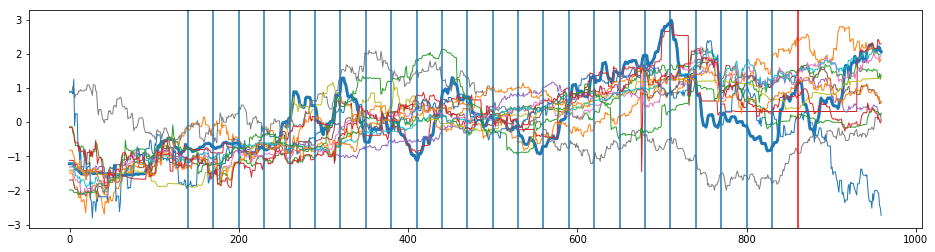

In [4]:
feature = np.concatenate([feature_train, feature_valid], 0)
target = np.concatenate([target_train, target_valid], 0)
plt.figure(figsize=(16,4)); plt.plot(target, linewidth=3); plt.plot(feature, linewidth=1);
[plt.axvline(x) for x in train_divisions]; plt.axvline(861, c='r'); plt.show()

In [5]:
def make_dataset(feature, target, divisions):
    X = []
    Y = []
    for d in divisions:
        X.append(np.concatenate([np.zeros([959-d,14]), np.concatenate([target[0:d+1], feature[0:d+1]], 1)], 0))
        Y.append(target[d+1:d+31]) # 長さ30で固定
    return X, Y

_x_train, _y_train = make_dataset(feature, target, train_divisions)
x_valid, y_valid = make_dataset(feature, target, valid_divisions)

x_train, y_train = _x_train[::2], _y_train[::2]
x_test, y_test = _x_train[1::2], _y_train[1::2]

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))
print(len(x_valid), len(y_valid))

12 12
12 12
70 70


train


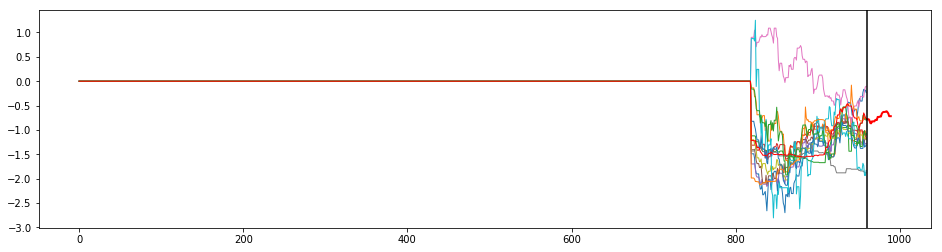

(960, 14) (30, 1)

test


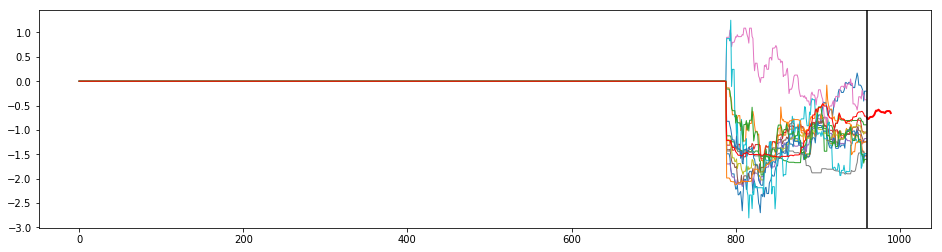

(960, 14) (30, 1)

valid


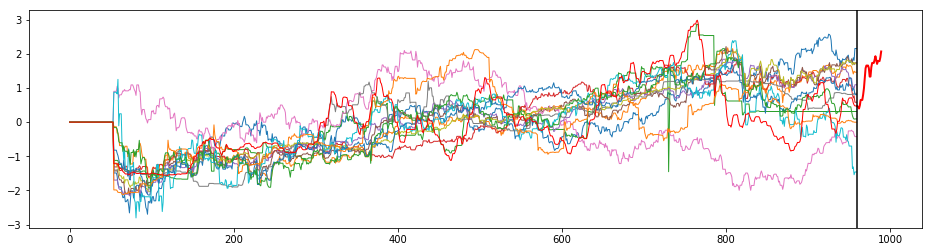

(960, 14) (30, 1)


In [6]:
print("train")
k = 0#np.random.randint(len(x_train))
l = len(x_train[k])
plt.figure(figsize=(16,4))
plt.plot(x_train[k][:,1:], linewidth=1);
plt.plot(x_train[k][:,0], linewidth=1, c='r');
plt.plot(np.arange(l, l+30), y_train[k], c='r', linewidth=2)
plt.axvline(l-0.5, c='k'); plt.show()
print(x_train[k].shape, y_train[k].shape)

print("\ntest")
k = 0#np.random.randint(len(x_test))
l = len(x_test[k])
plt.figure(figsize=(16,4))
plt.plot(x_test[k][:,1:], linewidth=1);
plt.plot(x_test[k][:,0], linewidth=1, c='r');
plt.plot(np.arange(l, l+30), y_test[k], c='r', linewidth=2)
plt.axvline(l-0.5, c='k'); plt.show()
print(x_test[k].shape, y_test[k].shape)

print("\nvalid")
k = np.random.randint(len(x_valid))
l = len(x_valid[k])
plt.figure(figsize=(16,4))
plt.plot(x_valid[k][:,1:], linewidth=1);
plt.plot(x_valid[k][:,0], linewidth=1, c='r');
plt.plot(np.arange(l, l+30), y_valid[k], c='r', linewidth=2)
plt.axvline(l-0.5, c='k'); plt.show()
print(x_valid[k].shape, y_valid[k].shape)

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from tqdm import tqdm
from collections import OrderedDict
import torch.nn.init as init

device = 'cuda' if torch.cuda.is_available() else 'cpu'
class Model(nn.Module):
    def __init__(self, input_size=14, hidden_size=16, output_size=14):
        super(Model, self).__init__()
        self.hidden_size = hidden_size
        
        self.fc_in  = nn.Linear(input_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, output_size)
        
        self.forget = nn.Linear(hidden_size*2, hidden_size)
        self.input  = nn.Linear(hidden_size*2, hidden_size)
        self.output = nn.Linear(hidden_size*2, hidden_size)
        self.state  = nn.Linear(hidden_size*2, hidden_size)
        
#         init.normal_(self.fc_in.weight, 0, 0.01)
#         init.constant_(self.fc_in.bias, 1)
#         init.normal_(self.fc_out.weight, 0, 0.01)
#         init.constant_(self.fc_out.bias, 1)
        
#         init.normal_(self.forget.weight, 0, 0.01)
#         init.constant_(self.forget.bias, 1)
#         init.normal_(self.input.weight, 0, 0.01)
#         init.constant_(self.input.bias, 1)
#         init.normal_(self.output.weight, 0, 0.01)
#         init.constant_(self.output.bias, 1)
#         init.normal_(self.state.weight, 0, 0.01)
#         init.constant_(self.state.bias, 1)
        
    def forward(self, input, l_pre, l_post):
        h_n = torch.zeros(len(input), self.hidden_size).to(device) # Nx256
        c_n = torch.zeros(len(input), self.hidden_size).to(device) # Nx256 cell
                
        for n in range(l_pre):
            i_n = input[:,n,:].clone() # batch_size N, T, features # Nxlen(features)
            ih_n = torch.cat((self.fc_in(i_n), h_n), dim=1)
            
            forget_gate = torch.sigmoid(self.forget(ih_n))
            input_gate  = torch.sigmoid(self.input(ih_n))
            state_gate  = torch.tanh(self.state(ih_n))
            output_gate = torch.sigmoid(self.output(ih_n))
            
            # Update internal cell state
            c_n = forget_gate * c_n + input_gate * state_gate
            h_n = output_gate * torch.tanh(c_n)            
            o_n = i_n + self.fc_out(h_n) # Nx256 -> Nx7
        
        output = []
        
        for n in range(l_pre,l_pre+l_post):
            i_n = o_n.clone()
            ih_n = torch.cat((self.fc_in(i_n), h_n), dim=1)

            forget_gate = torch.sigmoid(self.forget(ih_n))
            input_gate  = torch.sigmoid(self.input(ih_n))
            state_gate  = torch.tanh(self.state(ih_n))
            output_gate = torch.sigmoid(self.output(ih_n))

            # Update internal cell state
            c_n = forget_gate * c_n + input_gate * state_gate
            h_n = output_gate * torch.tanh(c_n)            
            o_n = i_n + self.fc_out(h_n) # Nx256 -> Nx7

            output.append(o_n)

        return torch.stack(output).transpose(0,1) # 30,N,14 -> N,30,14
    
    def manual_forward(self, input, l_pre, l_post, params):
        h_n = torch.zeros(len(input), self.hidden_size).to(device) # Nx256
        c_n = torch.zeros(len(input), self.hidden_size).to(device) # Nx256 cell
                
        for n in range(l_pre):
            i_n = input[:,n,:].clone() # batch_size N, T, features # Nxlen(features)
            ih_n = torch.cat((
                F.linear(i_n, params['fc_in.weight'].to(device), params['fc_in.bias'].to(device)),
                h_n), dim=1)
            
            forget_gate = torch.sigmoid(
                F.linear(ih_n, params['forget.weight'].to(device), params['forget.bias'].to(device)))
            input_gate  = torch.sigmoid(
                F.linear(ih_n, params['input.weight'].to(device), params['input.bias'].to(device)))
            state_gate  = torch.tanh(
                F.linear(ih_n, params['state.weight'].to(device), params['state.bias'].to(device)))
            output_gate = torch.sigmoid(
                F.linear(ih_n, params['output.weight'].to(device), params['output.bias'].to(device)))
            
            # Update internal cell state
            c_n = forget_gate * c_n + input_gate * state_gate
            h_n = output_gate * torch.tanh(c_n)            
            o_n = i_n + F.linear(h_n, params['fc_out.weight'].to(device), params['fc_out.bias'].to(device))
        
        output = []
            
        for n in range(l_pre,l_pre+l_post):
            i_n = o_n.clone()
            ih_n = torch.cat((
                F.linear(i_n, params['fc_in.weight'].to(device), params['fc_in.bias'].to(device)),
                h_n), dim=1)

            forget_gate = torch.sigmoid(
                F.linear(ih_n, params['forget.weight'].to(device), params['forget.bias'].to(device)))
            input_gate  = torch.sigmoid(
                F.linear(ih_n, params['input.weight'].to(device), params['input.bias'].to(device)))
            state_gate  = torch.tanh(
                F.linear(ih_n, params['state.weight'].to(device), params['state.bias'].to(device)))
            output_gate = torch.sigmoid(
                F.linear(ih_n, params['output.weight'].to(device), params['output.bias'].to(device)))

            # Update internal cell state
            c_n = forget_gate * c_n + input_gate * state_gate
            h_n = output_gate * torch.tanh(c_n)            
            o_n = i_n + F.linear(h_n, params['fc_out.weight'].to(device), params['fc_out.bias'].to(device))

            output.append(o_n)

        return torch.stack(output).transpose(0,1) # 30,N,14 -> N,30,14

In [21]:
n_local_update = 1
loss_fn = F.mse_loss
batch_size=6

In [22]:
np.arange(10)[:-1], np.arange(10)[-1:]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([9]))

In [23]:
class MetaLearner(object):
    def __init__(self):
        self.lr = 0.01 # 0.1 # TODO
        self.momentum = 0.9 #0.5
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.master_net = Model(14,32,14).to(self.device)
        self.master_opt = optim.Adam(self.master_net.parameters())
        self.keys = self.master_net.state_dict().keys()
    
    def copy_params(self, from_net, to_net):
        params = {k: v for k, v in from_net.state_dict().items() if k in self.keys}
        to_net.load_state_dict(params, strict=False)
    
    def save(self, model_path):
        torch.save(self.master_net.state_dict(), model_path)
    
    def load(self, model_path):
        self.master_net.load_state_dict(torch.load(model_path))
    
    def meta_test(self):
        
        valid_loader = [DataLoader(BalticDryIndexDataset(x_valid, y_valid), batch_size=batch_size, shuffle=True)]
        all_test_loss, all_test_acc = [], [] # For logging.
        
        with tqdm(valid_loader, desc="Meta Test", ncols=10) as _tqdm:                                                         
            for meta_train_task in _tqdm:
                
                # copy master model to new branch model
                faster_net = Model(14,32,14).to(self.device)
                self.copy_params(self.master_net, faster_net)
                faster_opt = optim.SGD(faster_net.parameters(), lr=self.lr, momentum=self.momentum)
                
                # make local task data loader
                local_task_data_loader = meta_train_task
                # local_task_test_data_loader = meta_train_task["test"]

                # ----------------------------------------------------------------
                # meta valid task train
                # ----------------------------------------------------------------
                
                for epoch in range(n_local_update):
                    flag=0
                    for x_batch, y_batch in local_task_data_loader:
                        flag+=1
                        if flag>8:
                            break
                        x_batch, y_batch = x_batch.to(self.device), y_batch.to(self.device)                        
                        output = faster_net(x_batch[:,:-30], l_pre=len(x_batch[0])-30, l_post=30) # 未来30個の14データを予測
                        
                        loss = loss_fn(output, x_batch[:,-30:])
                        loss.backward()
                        faster_opt.step()
                        
                        
                # ----------------------------------------------------------------
                # meta valid task test
                # ----------------------------------------------------------------
                
                test_loss = []
                test_acc = []
                
                for x_batch, y_batch in local_task_data_loader:
                    x_batch, y_batch = x_batch.to(self.device), y_batch.to(self.device)
                    output = faster_net(x_batch, l_pre=len(x_batch[0]), l_post=30)
                    
                    loss = loss_fn(output[:,:,0:1], y_batch)
                          
                    test_loss.append(loss.item())
                    test_acc.append(np.mean(np.abs((output[:,-1].data - y_batch[:,-1].data).cpu().numpy()) < 0.1))
                                  
                all_test_loss.append(np.mean(test_loss))
                all_test_acc.append(np.mean(test_acc))
        
        # ----------------------------------------------------------------
        # end all tasks
        # ----------------------------------------------------------------
        
        return np.mean(all_test_loss), np.mean(all_test_acc)
    
    def meta_train(self):
        
        train_loader = [DataLoader(BalticDryIndexDataset(x_train, y_train), batch_size=batch_size, shuffle=True)]
        
        meta_grads = []
        
        all_test_loss, all_test_acc = [], [] # For logging.
        
        with tqdm(train_loader, desc="Meta Train", ncols=10) as _tqdm:
            for meta_train_task in _tqdm:
                
                # copy master model to new branch model
                faster_net = Model(14,32,14).to(self.device)
                faster_net.forward = NotImplementedError # goodbye!
                self.copy_params(self.master_net, faster_net)

                faster_params = OrderedDict((name, param) for (name, param) in faster_net.named_parameters())

                # make local task data loader
                local_task_data_loader = meta_train_task
                # local_task_test_data_loader = meta_train_task["test"]

                # ----------------------------------------------------------------
                # meta train task train
                # ----------------------------------------------------------------

                first_train_for_this_task = True

                for epoch in range(n_local_update):
                    
                    train_loss = []
                    
                    for x_batch, y_batch in local_task_data_loader:
                        x_batch, y_batch = x_batch.to(self.device), y_batch.to(self.device)

                        if first_train_for_this_task:
                            # manual predict
                            output = self.master_net(x_batch[:,:-30], l_pre=len(x_batch[0])-30, l_post=30) # 未来30個の14データを予測
                            loss = loss_fn(output, x_batch[:,-30:])
                            
                            train_loss.append(loss.item())
                            
                            grads = torch.autograd.grad(loss, self.master_net.parameters(), create_graph=True)

                            first_train_for_this_task = False

                        else:
                            # manual predict
                            output = faster_net.manual_forward(x_batch[:,:-30], l_pre=len(x_batch[0])-30, l_post=30, params=faster_params)
                            loss = loss_fn(output, x_batch[:,-30:])
                            
                            train_loss.append(loss.item())
                            
                            grads = torch.autograd.grad(loss, faster_params.values(), create_graph=True)
        
                        # manual optimize!!!
                        faster_params = OrderedDict(
                            (name, param - self.lr*grad)
                            for ((name, param), grad) in zip(faster_params.items(), grads)
                        )
                    
                    _tqdm.set_postfix(OrderedDict(
                        epoch=epoch+1, 
                        train_loss="{:.3f}".format(np.mean(train_loss)), 
                        test_loss="...", 
                        test_acc="..."))
                
                # ----------------------------------------------------------------
                # meta train task test
                # ----------------------------------------------------------------
                
                test_loss = []
                test_acc = []
                
                for x_batch, y_batch in local_task_data_loader:
                    x_batch, y_batch = x_batch.to(self.device), y_batch.to(self.device)

                    output = faster_net.manual_forward(x_batch, l_pre=len(x_batch[0]), l_post=30, params=faster_params)
                    loss = loss_fn(output[:,:,0:1], y_batch)

                    # differentiates test_loss by master_net params
                    grads = torch.autograd.grad(loss, self.master_net.parameters(), retain_graph=True)
                    grads = {name:g for ((name, _), g) in zip(faster_net.named_parameters(), grads)}
                    meta_grads.append(grads)
                                      
                    test_loss.append(loss.item())
                    test_acc.append(np.mean(np.abs((output[:,-1].data - y_batch[:,-1].data).cpu().numpy()) < 0.1))
                
                _tqdm.set_postfix(OrderedDict(
                    epoch=epoch+1, 
                    train_loss="...", 
                    test_loss="{:.3f}".format(np.mean(test_loss)), 
                    test_acc="{:.3f}".format(np.mean(test_acc))))
                                  
                all_test_loss.append(np.mean(test_loss))
                all_test_acc.append(np.mean(test_acc))
        
        # ----------------------------------------------------------------
        # end all tasks
        # ----------------------------------------------------------------
        
        # ----------------------------------------------------------------
        # meta update
        # ----------------------------------------------------------------
        
        meta_grads = {k: sum(grads[k] for grads in meta_grads) for k in meta_grads[0].keys()}
        
        # using data,target from somewhere
        dumy_output = self.master_net(x_batch, l_pre=len(x_batch[0]), l_post=30)
        dumy_loss = loss_fn(dumy_output[:,:,0:1], y_batch) #######################TODO
        
        # after dumy_loss.backward, rewrite grads
        self.master_opt.zero_grad()
        dumy_loss.backward(retain_graph=True)

        hooks = []
        for (k,v) in self.master_net.named_parameters():
            def get_closure():
                key = k
                def replace_grad(grad):
                    return meta_grads[key]
                return replace_grad
            hooks.append(v.register_hook(get_closure()))

        # Compute grads for current step, replace with summed gradients as defined by hook
        self.master_opt.zero_grad()
        dumy_loss.backward()

        # Update the net parameters with the accumulated gradient according to optimizer
        self.master_opt.step()

        # Remove the hooks before next training phase
        for h in hooks:
            h.remove()

        return np.mean(all_test_loss), np.mean(all_test_acc)

In [24]:
class BalticDryIndexDataset(Dataset):
    def __init__(self, X, Y):
        self.X = np.array(X, np.float32)
        self.Y = np.array(Y, np.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [25]:
meta_learner = MetaLearner()

for epoch in range(100):
    
    train_loss, train_acc = meta_learner.meta_train()
    test_loss, test_acc = meta_learner.meta_test()
    
    print("# {} (meta-train-task) test_loss: {:.6f}, test_acc: {:.6f}".format(
        epoch+1, train_loss, train_acc))
    print("# {}  (meta-test-task) test_loss: {:.6f}, test_acc: {:.6f}".format(
        epoch+1, test_loss, test_acc))
    
    model_path = "./model/model-epoch_{:05}-train_loss_{:0.3f}-train_acc_{:0.3f}-test_loss_{:0.3f}-test_acc_{:0.3f}.pt".format(
        epoch, train_loss, train_acc, test_loss, test_acc)
    
    meta_learner.save(model_path)
#     meta_learner.load(model_path)

Meta Test:   0%| | 0/1 [00:00<?, ?it/s]


TypeError: 'DataLoader' object is not subscriptable

In [ ]:
# model = Model(1, 8, 1)
# data_loader = DataLoader(SinDataset(), batch_size=10, shuffle=True)
# x,_ = iter(data_loader).next()
# print(x.shape)
# output, hidden, cell = model(x)
# output.shape, hidden.shape, cell.shape

In [10]:
model = Model(input_size=14, hidden_size=32, output_size=14)
data_loader = DataLoader(BalticDryIndexDataset(x_train, y_train), 
                         batch_size=10, shuffle=True)
x,_ = iter(data_loader).next()
print(x.shape)
output = model(x, l_pre=960, l_post=30, train=True)
print(output.shape)

torch.Size([10, 960, 14])
torch.Size([10, 960, 14])


In [11]:
train_loss_hist = []
test_loss_hist = []
test_acc_hist = []
valid_loss_hist = []
valid_acc_hist = []
model = Model(input_size=14, hidden_size=32, output_size=14)

In [47]:
# torch.save(model.state_dict(), "model/lstm-1_h16_1000epochs.pt")
# model.load_state_dict(torch.load("model/lstm-1_h16_1000epochs.pt"))

In [14]:
k = np.random.randint(len(x))
l_pre=960
l_post=30

torch.Size([10, 960, 14]) torch.Size([10, 30, 1])
torch.Size([10, 30, 14])
(10, 960, 14) (10, 30, 1) (10, 30, 14)


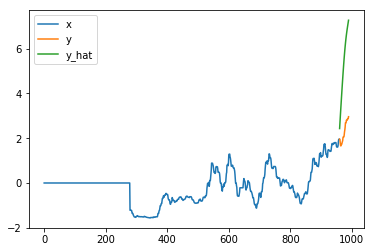

In [17]:
# 予測
train_loader = DataLoader(BalticDryIndexDataset(x_train, y_train), batch_size=10, shuffle=False)
x,y = iter(train_loader).next()
print(x.shape, y.shape)
output = meta_learner.master_net(x.to(device), l_pre=l_pre, l_post=l_post)
print(output.shape)

output = output.cpu().detach().numpy()
x = x.detach().numpy()
y = y.detach().numpy()
print(x.shape, y.shape, output.shape)

plt.plot(range(0, len(x[0])), x[k,:,0], label="x")
plt.plot(range(len(x[0]), len(x[0])+len(y[0])), y[k,:,0], label="y")
plt.plot(range(len(x[0]), len(x[0])+len(y[0])), output[k,:,0], label="y_hat")
# plt.plot(range(0, len(x[0])), output[k,:,0], label="y_hat")
plt.legend()
plt.show()

torch.Size([10, 960, 14]) torch.Size([10, 30, 1])
torch.Size([10, 30, 14])
(10, 960, 14) (10, 30, 1) (10, 30, 14)


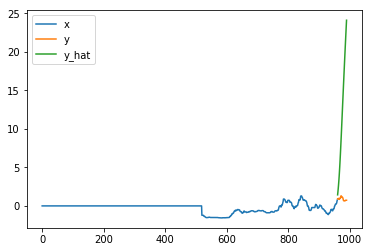

In [26]:
# 予測
train_loader = DataLoader(BalticDryIndexDataset(x_train, y_train), batch_size=10, shuffle=False)
x,y = iter(train_loader).next()
print(x.shape, y.shape)
output = meta_learner.master_net(x.to(device), l_pre=l_pre, l_post=l_post, train=False)
print(output.shape)

output = output.cpu().detach().numpy()
x = x.detach().numpy()
y = y.detach().numpy()
print(x.shape, y.shape, output.shape)

plt.plot(range(0, len(x[0])), x[k,:,0], label="x")
plt.plot(range(len(x[0]), len(x[0])+len(y[0])), y[k,:,0], label="y")
plt.plot(range(len(x[0]), len(x[0])+len(y[0])), output[k,:,0], label="y_hat")
# plt.plot(range(0, len(x[0])), output[k,:,0], label="y_hat")
plt.legend()
plt.show()